In [9]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn import preprocessing

In [10]:
df = pd.read_csv("BostonHousing.csv")
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
df.head(20)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


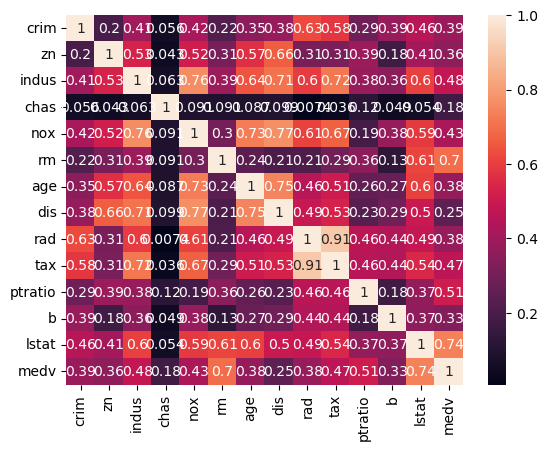

In [13]:
sns.heatmap(df.corr().abs(),  annot=True)

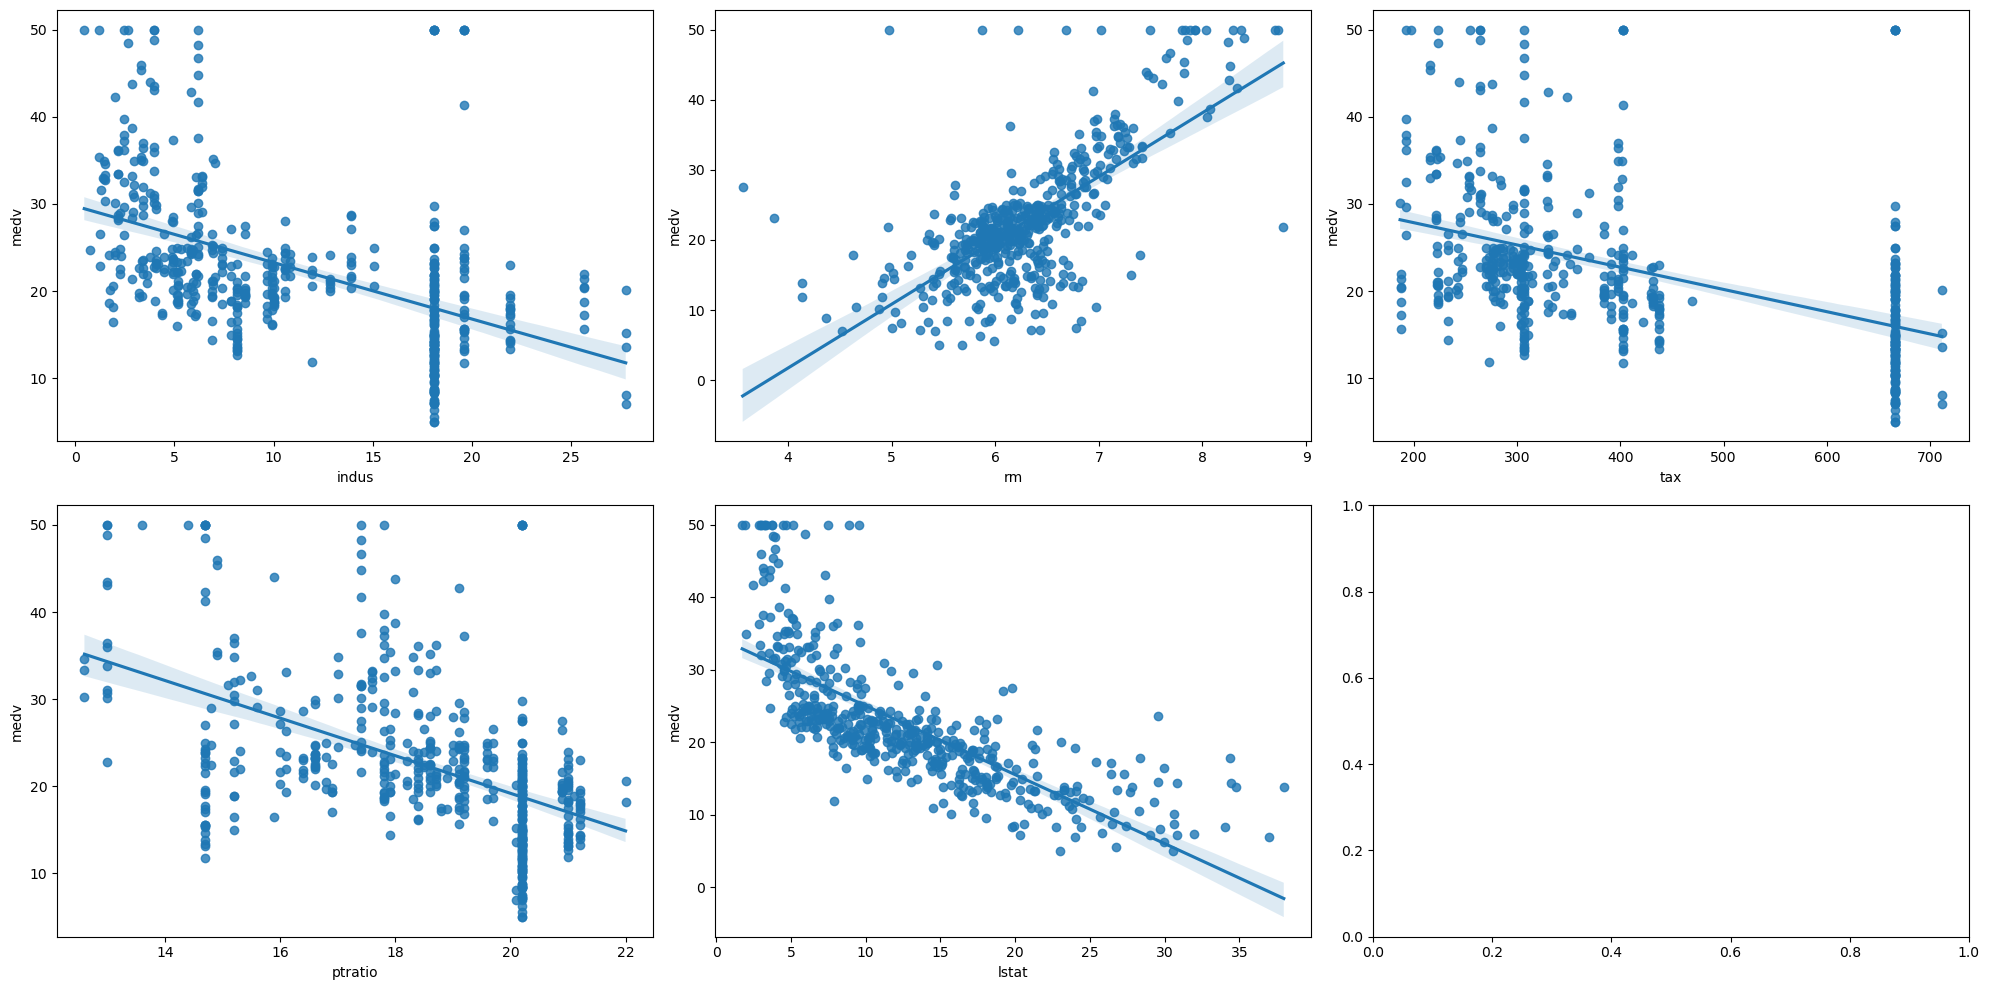

In [35]:
colums = ["indus", "rm", "tax", "ptratio", "lstat"]
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
axs = axs.flatten()
for i,j in enumerate(colums):
    sns.regplot(data=df, x= j, y='medv', ax= axs[i])
    plt.tight_layout()

In [16]:
df_price_from_conditions = df.groupby('medv')["rm"].agg([("min","min"),("max","max"),("mean","mean"),("count","count")]).reset_index()
df_price_from_conditions

,medv,min,max,mean,count
0,5.0,5.453,5.683,5.5680,2
1,5.6,5.987,5.987,5.9870,1
2,6.3,5.852,5.852,5.8520,1
3,7.0,4.519,5.414,4.9665,2
4,7.2,5.277,6.434,6.0180,3
...,...,...,...,...,...
224,46.7,7.686,7.686,7.6860,1
225,48.3,8.247,8.247,8.2470,1
226,48.5,7.853,7.853,7.8530,1
227,48.8,8.398,8.398,8.3980,1


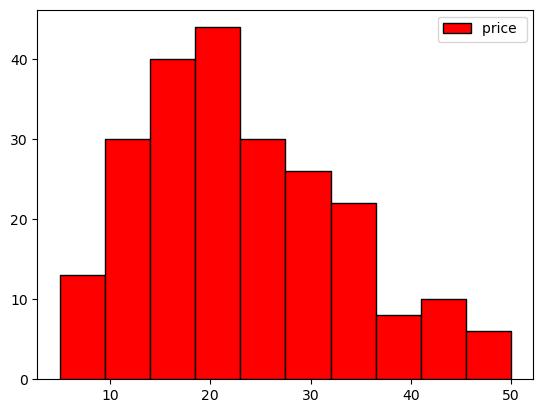

In [17]:
plt.hist(df_price_from_conditions["medv"], color="red",ec="black",bins= 10)
plt.legend(["price "])

In [18]:
df_price_from_tax = df.groupby("tax")["medv"].agg([("min","min"),("max","max"),("mean","mean"),("count","count")]).reset_index()
df_price_from_tax

,tax,min,max,mean,count
0,187,30.1,30.1,30.100000,1
1,188,15.7,22.0,19.428571,7
2,193,26.4,50.0,36.200000,8
3,198,50.0,50.0,50.000000,1
4,216,33.0,46.0,38.980000,5
...,...,...,...,...,...
61,432,18.3,22.8,19.688889,9
62,437,13.3,23.0,17.093333,15
63,469,18.9,18.9,18.900000,1
64,666,5.0,50.0,16.403788,132


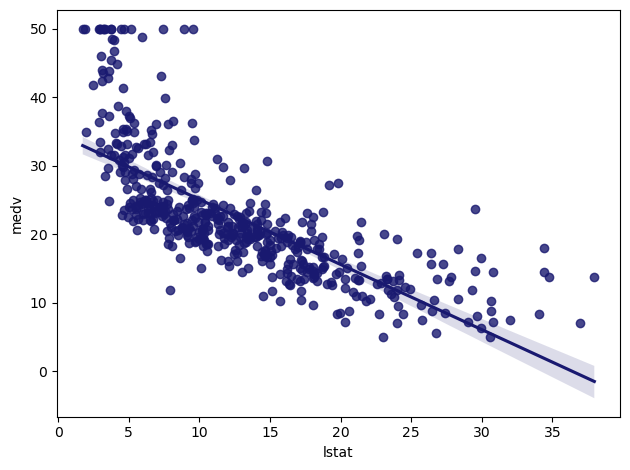